<a href="https://colab.research.google.com/github/jasonngai01/AI_Appreciation_for-OUHK_STEAM/blob/main/CNN_training_Paper_Rock_Stone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

# Tensorflow Image Classification 




In [ ]:
# Change Hardware accelerator to "GPU" in Runtime type 


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# Mount your Google Drive to the Colab 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a folder in Google Drive and name it as "dataset"
# Upload your dataset to the "dataset" folder
# The dataset folder must contain the train folder which storing 90% training images.
# The dataset folder must contain the test folder which storing 10% testing images.

# Take the "Paper, Rock & Scissors" as example, there are 3 catagories, which is Paper, Rock and Scissors, in "train" and "test" folder. 
# There are 6 folders in total.

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Paper, scissor & rock TFIC/train'
valid_path = '/content/drive/MyDrive/Dataset/Paper, scissor & rock TFIC/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Paper, scissor & rock TFIC/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Paper, scissor & rock TFIC/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 170 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Paper, scissor & rock TFIC/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 16 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
11/11 [==============================] - 86s 5s/step - loss: 3.0509 - accuracy: 0.6235 - val_loss: 0.2977 - val_accuracy: 0.8750
Epoch 2/10
11/11 [==============================] - 3s 298ms/step - loss: 0.1089 - accuracy: 0.9765 - val_loss: 0.8266 - val_accuracy: 0.8125
Epoch 3/10
11/11 [==============================] - 3s 299ms/step - loss: 0.1583 - accuracy: 0.9706 - val_loss: 0.1519 - val_accuracy: 0.8750
Epoch 4/10
11/11 [==============================] - 3s 304ms/step - loss: 0.0869 - accuracy: 0.9824 - val_loss: 0.6463 - val_accuracy: 0.8750
Epoch 5/10
11/11 [==============================] - 3s 313ms/step - loss: 0.0306 - accuracy: 0.9941 - val_loss: 0.6333 - val_accuracy: 0.8750
Epoch 6/10
11/11 [==============================] - 3s 310ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.1335 - val_accuracy: 0.8750
Epoch 7/10
11/11 [==============================] - 4s 319ms/step - loss: 0.0079 - accuracy: 0.9941 - val_loss: 0.3844 - val_accuracy: 0.8750
Epoch 8/

In [ ]:
import matplotlib.pyplot as plt

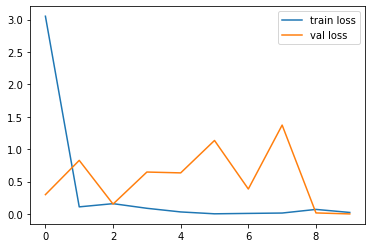

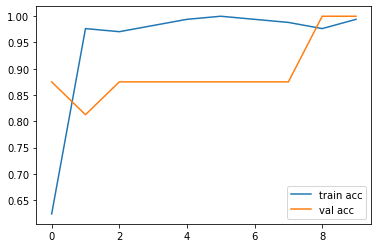

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('PRS_model_inception.h5')


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# Upload the Picture which you want to TEST in Google drive

from google.colab import files
uploaded  = files.upload()

# Once the image uploaded, copy the image path in the directory

Saving img_017.JPG to img_017.JPG


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def show_image(path):
  img = mpimg.imread(path)
  plt.imshow(img)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

network_path = 'PRS_model_inception.h5'
# Place your image to the below path
image_path = '/content/drive/MyDrive/Dataset/Paper, scissor & rock TFIC/test/rock/img_006.JPG'


[[2.0532694e-14 1.0000000e+00 9.7044443e-13]]
AI output -> Class: Rock Prob:100.0%


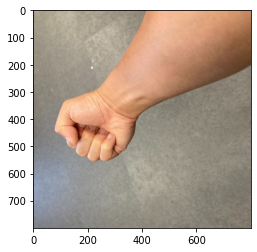

In [ ]:
model=load_model(network_path)
img=image.load_img(image_path,target_size=(224,224))


x=image.img_to_array(img)
y = np.array(img)
img_show = Image.open(image_path)


x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

# Inference
output = model.predict(img_data)
print(output)
a=np.argmax(output)
prob=output[0][a]
class_names = ['Paper', 'Rock', 'Scissors']
test_label = class_names[a]
prob = str(prob*100) + "%"
print("AI output -> Class: {} Prob:{}".format(test_label,prob))

# Plot
show_image(image_path)